ANEMO allows you to perform Fits on data of Smooth Pursuite Eyes Movements. You could use the functions ‘velocity’, ‘position’ and ‘saccades’ already present, but also your own functions. It must be initialized with the parameters of the experiment :

# The parameters of the experiment

**param_exp** is dictionary containing the parameters of the experiment

In [1]:
import pickle

expfile = 'data/enregistrement_AM_2017-10-23_100057.pkl'
with open(expfile, 'rb') as fichier :
    param_exp = pickle.load(fichier, encoding='latin1')

## obligatory

### N_trials

`param_exp['N_trials']` (int) - number of trials per block

In [2]:
param_exp['N_trials']

200

### N_blocks

`param_exp['N_blocks']` (int) - number of blocks

In [3]:
param_exp['N_blocks']

3

### dir_target

`param_exp['dir_target']` (list(list(int))) - list of lists for each block containing the direction of the target for each trial

    #the direction of the target is to -1 for left 1 for right
    dir_target = param_exp['dir_target'][block][trial]

or `param_exp[‘p’]` (ndarray) - ndarray containing for each trial of each block the direction of the target, its probability of direction and the switches of this probability:

    # the direction of the target is to 0 for left 1 for right
    dir_target = param_exp['p'][trial, block, 0]
    proba = param_exp['p'][trial, block, 1]
    switch = param_exp['p'][trial, block, 2]

In [4]:
for block in range(param_exp['N_blocks']) :
    print('Block %s :'%block, end=' ')
    for trial in range(param_exp['N_trials']) :
        print(param_exp['p'][trial, block, 0], end='  ')
    print('')

Block 0 : 0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  

### px_per_deg

`param_exp['px_per_deg']` (float) - number of px per degree for the experiment

In [5]:
param_exp['px_per_deg']

36.51807384230632

## Optional

### observer

`param_exp['observer']` (str, optional) - subject name

In [6]:
param_exp['observer']

'AM'

### list_events

`param_exp['list_events']` (list, optional) - list of the names of the events of the trial

    ['onset fixation', 'end fixation', 'start pursuit', 'end pursuit']

    by default :
        ['StimulusOn\n', 'StimulusOff\n', 'TargetOn\n', 'TargetOff\n']

### V_X_deg

`param_exp['V_X_deg']` (float, optional) - target velocity in deg/s

In [7]:
param_exp['V_X_deg']

15

### stim_tau

`param_exp['stim_tau']` (float, optional) - presentation time of the target

In [8]:
param_exp['stim_tau']

0.75

### RashBass

`param_exp['RashBass']` (int, optional) - the time the target has to arrive at the center of the screen in ms, to move the target back to t=0 of its `RashBass = velocity*latency`

In [9]:
param_exp['RashBass']

100

# Retrieving the data

In [10]:
from ANEMO import read_edf

`read_edf(filename, start, stop=None, missing=0.0, debug=False)`

Does not actually read EDFs directly, but the ASC files that are produced by edf2asc (SR Research). Information on saccades, fixations and blinks is read from the EDF, therefore based on SR Research algorithms.

Returns a list with dicts for every trial. A trial dict contains the
following keys:

- **x**		-	numpy array of x positions
- **y**		-	numpy array of y positions
- **size**		-	numpy array of pupil size
- **time**		-	numpy array of timestamps, t=0 at trialstart
- **trackertime**	-	numpy array of timestamps, according to EDF
- **events**	-	dict with the following keys:
     - **Sfix**	-	list of lists, each containing `[starttime]`
     - **Ssac**	-	list of lists, each containing `[starttime]`
     - **Sblk**	-	list of lists, each containing `[starttime]`
     - **Efix**	-	list of lists, each containing `[starttime, endtime, duration, endx, endy]`
    - **Esac**	-	list of lists, each containing `[starttime, endtime, duration, startx, starty, endx, endy]`
    - **Eblk**	-	list of lists, each containing `[starttime, endtime, duration]`
    - **msg**	-	list of lists, each containing `[time, message]`
    
**NOTE :** timing is in EDF time!

**arguments :**
- filename		-	path to the file that has to be read
- start		-	trial start string

**keyword arguments:**
- stop			-	trial ending string (default = None)
- missing		-	value to be used for missing data (default = 0.0)
- debug		-	Boolean indicating if DEBUG mode should be on or off;
            if DEBUG mode is on, information on what the script
            currently is doing will be printed to the console
            (default = False)

**returns :**
- data			-	a list with a dict for every trial (see above)

In [11]:
datafile = 'data/enregistrement_AM_2017-10-23_100057.asc'
data = read_edf(datafile, 'TRIALID')

# Data

In [12]:
from ANEMO import ANEMO
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
Plot = ANEMO.Plot(param_exp)

In [14]:
# number of the block and trial that you want to display
block, trial  = 1, 1

In [15]:
# display the first ten trials
data1 = data[:10]

## velocity

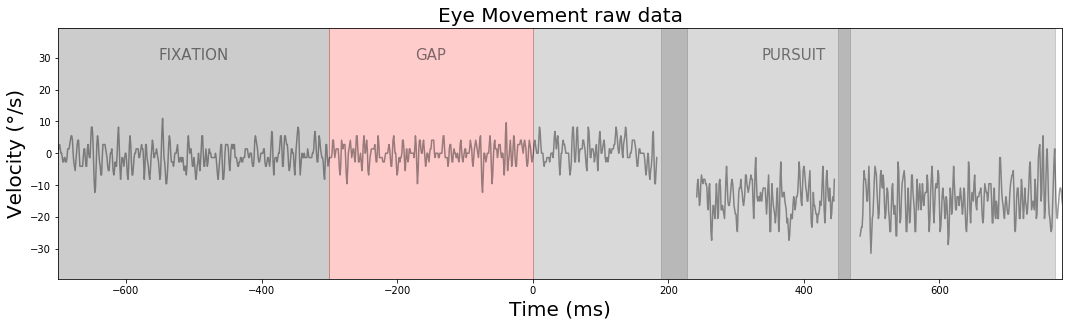

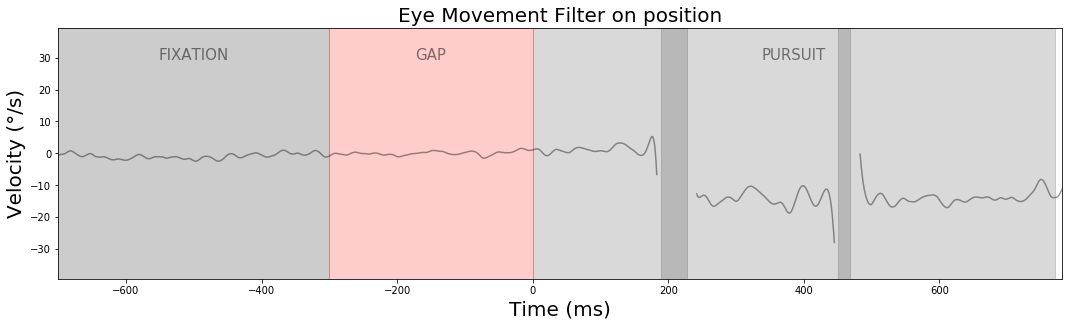

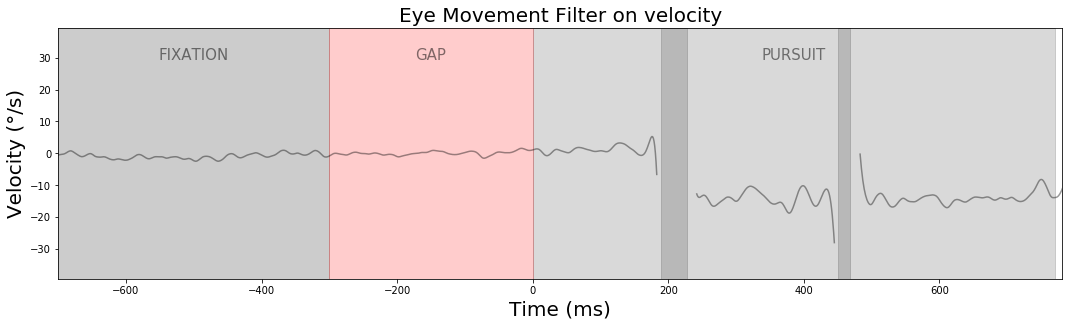

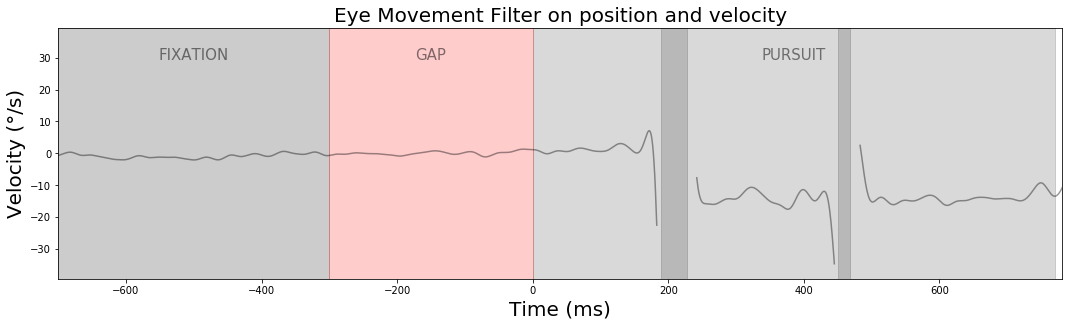

In [16]:
#-------------------------------------------------------------------------------
# Raw Data
#-------------------------------------------------------------------------------
fig, axs = Plot.plot_data(data=data, show='velocity',
                          trials=trial, block=block,
                          title='Eye Movement raw data')

#-------------------------------------------------------------------------------
# Data filtered
#-------------------------------------------------------------------------------

# on the position
#-------------------------------------------------------------------------------
fig, axs = Plot.plot_data(data=data, show='velocity',
                          trials=trial, block=block,
                          filt='position', cutoff=30, sample_rate=1000,
                          title='Eye Movement Filter on position')

# on the velocity
#-------------------------------------------------------------------------------
fig, axs = Plot.plot_data(data=data, show='velocity',
                          trials=trial, block=block,
                          filt='velocity', cutoff=30, sample_rate=1000,
                          title='Eye Movement Filter on velocity')

# on the position and the velocity
#-------------------------------------------------------------------------------
fig, axs = Plot.plot_data(data=data, show='velocity',
                          trials=trial, block=block,
                          filt='velocity-position', cutoff=30, sample_rate=1000,
                          title='Eye Movement Filter on position and velocity')

## position

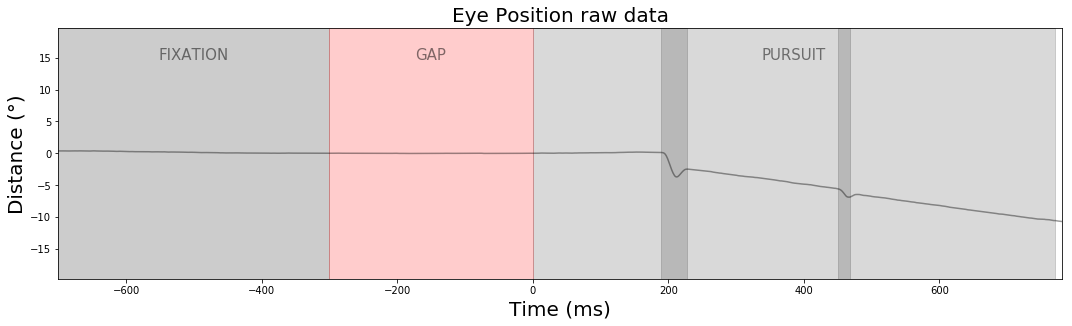

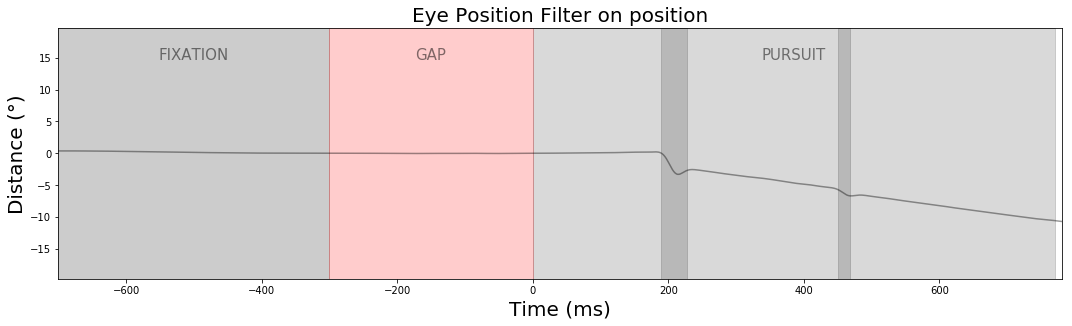

In [17]:
# Raw Data
#----------------------------------------------------------------------
fig, axs = Plot.plot_data(data=data, show='position',
                          trials=trial, block=block,
                          title='Eye Position raw data')

# Data filtered on the position
#----------------------------------------------------------------------
fig, axs = Plot.plot_data(data=data, show='position',
                          trials=trial, block=block,
                          filt='position', cutoff=30, sample_rate=1000,
                          title='Eye Position Filter on position')

## saccade

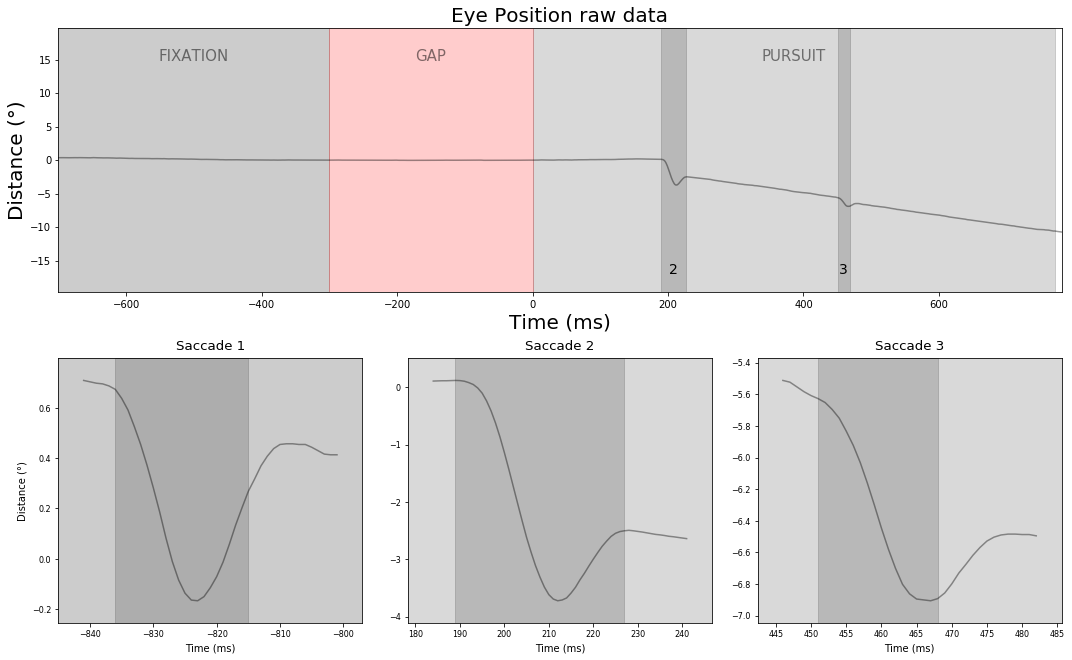

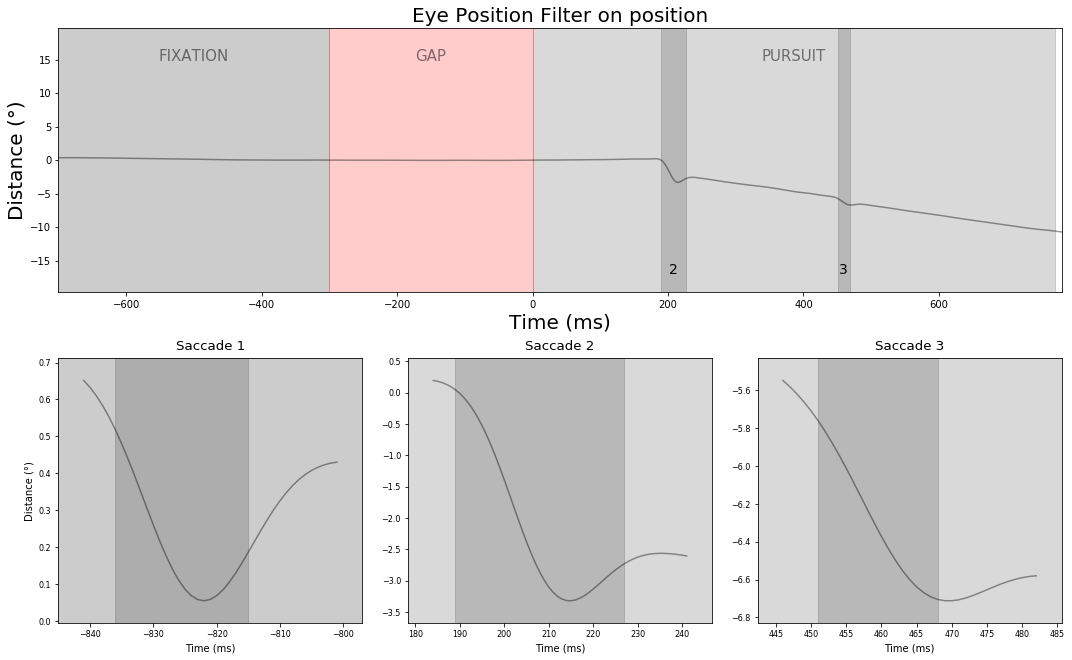

In [18]:
# Raw Data
#----------------------------------------------------------------------
fig, axs = Plot.plot_data(data=data, show='saccade',
                          trials=trial, block=block,
                          title='Eye Position raw data')

# Data filtered on the position
#----------------------------------------------------------------------
fig, axs = Plot.plot_data(data=data, show='saccade',
                          trials=trial, block=block,
                          filt='position', cutoff=30, sample_rate=1000,
                          title='Eye Position Filter on position')

# Equation

## velocity

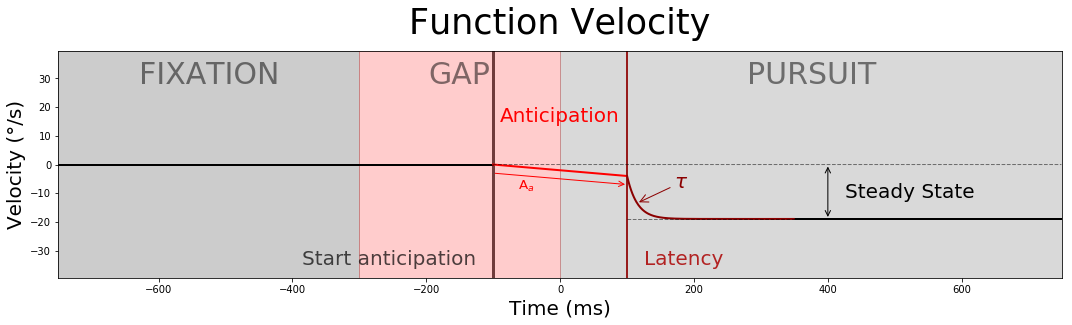

In [19]:
fig, axs = Plot.plot_equation(equation='fct_velocity')

## position

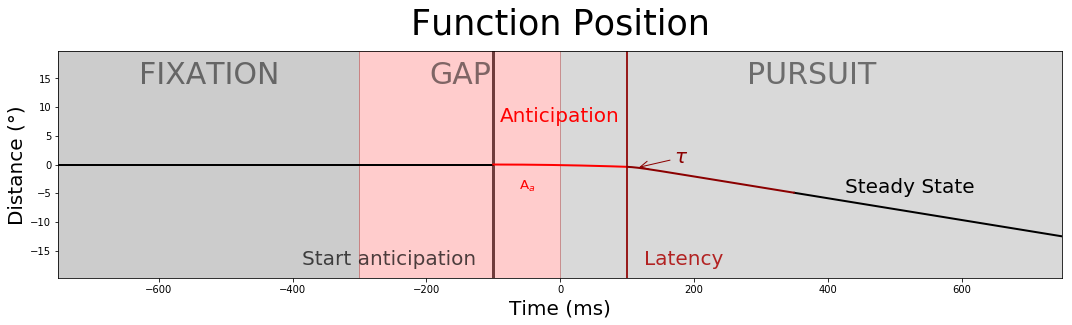

In [20]:
fig, axs = Plot.plot_equation(equation='fct_position')

## saccade

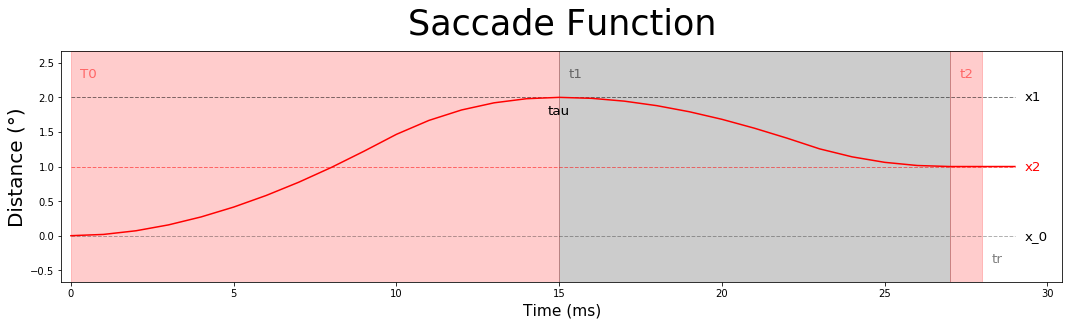

In [21]:
fig, axs = Plot.plot_equation(equation='fct_saccade')

# Fit

In [19]:
Fit = ANEMO.Fit(param_exp)

## velocity

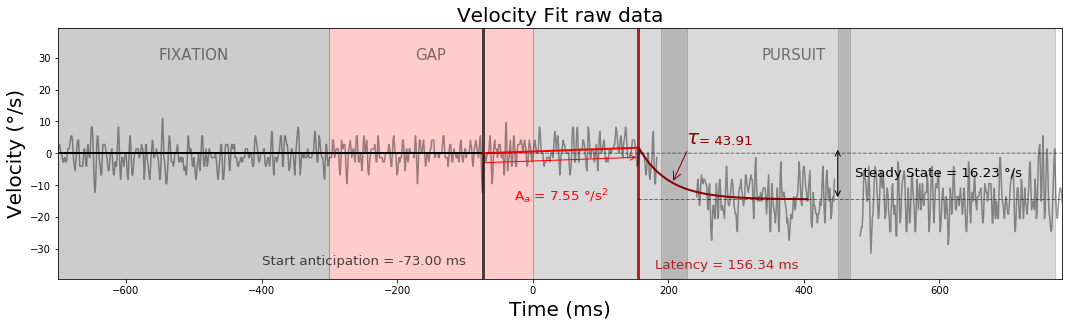

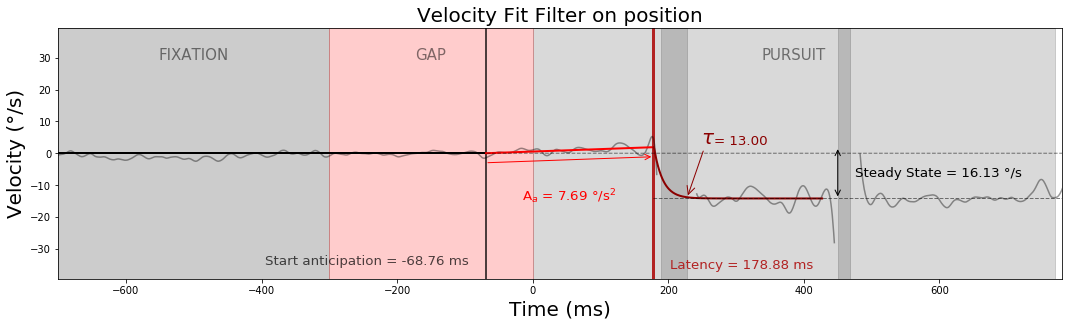

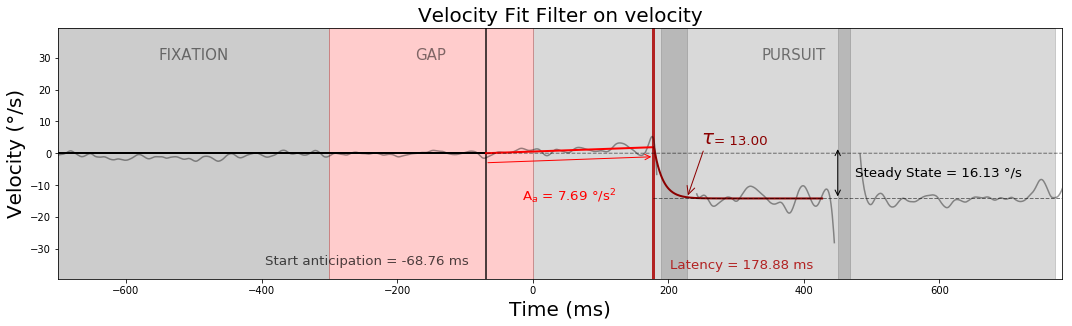

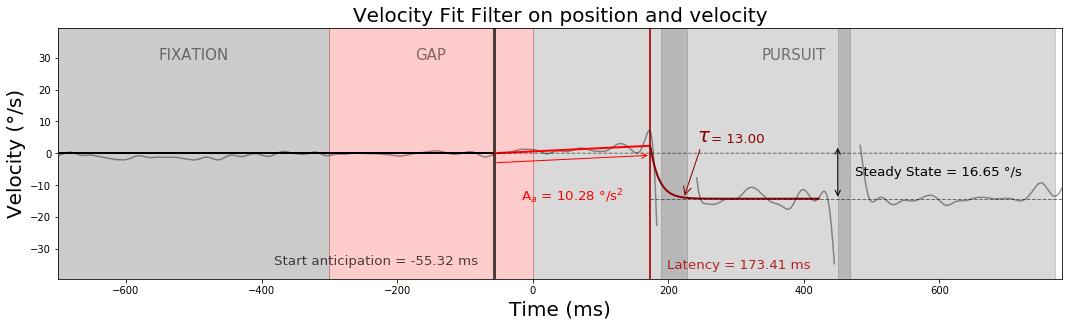

In [23]:
#------------------------------------------------------------------------------
# Raw Data
#------------------------------------------------------------------------------
fig, axs = Plot.plot_fit(data=data, equation='fct_velocity',
                         trials=trial, block=block,
                         title='Velocity Fit raw data')

#------------------------------------------------------------------------------
# Data filtered
#------------------------------------------------------------------------------

# on the position
#------------------------------------------------------------------------------
fig, axs = Plot.plot_fit(data=data, equation='fct_velocity',
                         trials=trial, block=block,
                         filt='position', cutoff=30, sample_rate=1000,
                         title='Velocity Fit Filter on position')

# on the velocity
#------------------------------------------------------------------------------
fig, axs = Plot.plot_fit(data=data, equation='fct_velocity',
                         trials=trial, block=block,
                         filt='velocity', cutoff=30, sample_rate=1000,
                         title='Velocity Fit Filter on velocity')

# on the position and the velocity
#------------------------------------------------------------------------------
fig, axs = Plot.plot_fit(data=data, equation='fct_velocity',
                         trials=trial, block=block,
                         filt='velocity-position', cutoff=30, sample_rate=1000,
                         title='Velocity Fit Filter on position and velocity')

## position

KeyboardInterrupt: 

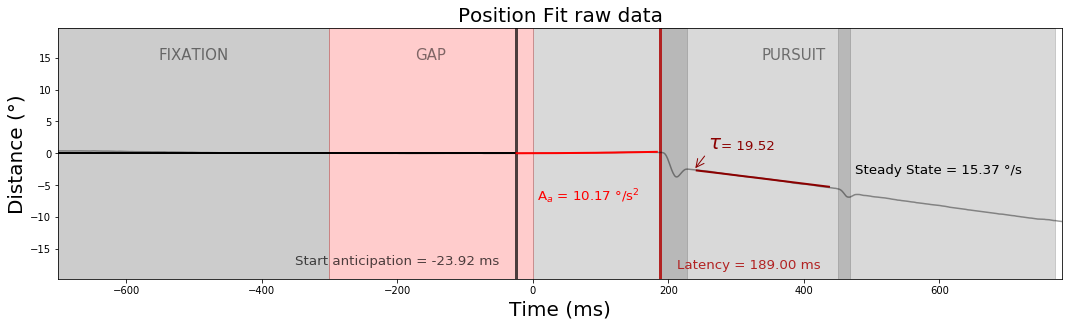

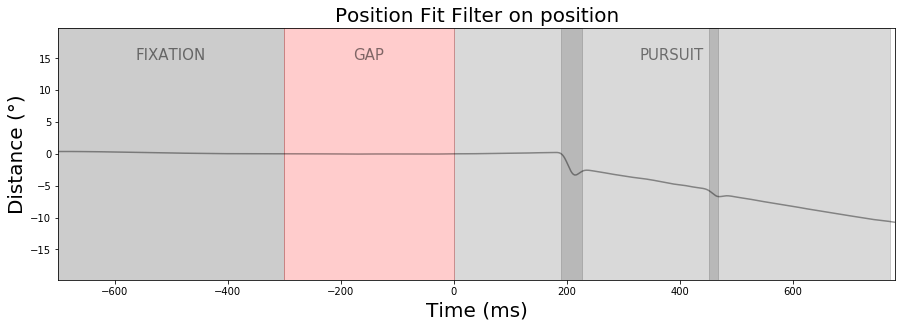

In [24]:
# Raw Data
#---------------------------------------------------------------------
fig, axs = Plot.plot_fit(data=data, equation='fct_position',
                         trials=trial, block=block,
                         title='Position Fit raw data')

# Data filtered on the position
#---------------------------------------------------------------------
fig, axs = Plot.plot_fit(data=data, equation='fct_position',
                         trials=trial, block=block,
                         filt='position', cutoff=30, sample_rate=1000,
                         title='Position Fit Filter on position')

## saccade

In [ ]:
# Raw Data
#---------------------------------------------------------------------
fig, axs = Plot.plot_fit(data=data, equation='fct_saccade',
                         trials=trial, block=block,
                         title='Position Fit raw data')

# Data filtered on the position
#---------------------------------------------------------------------
fig, axs = Plot.plot_fit(data=data, equation='fct_saccade',
                         trials=trial, block=block,
                         filt='position', cutoff=30, sample_rate=1000,
                         title='Position Fit Filter on position')

# Full

In [16]:
# data divided into two blocks of 5 trials each
N_blocks, N_trials = 1, 1

In [34]:
def Full(data_show):
    print('\nPlot Full Data\n', '-'*14, '\n', sep='')
    Plot.plot_Full_data(data=data1, show=data_show,
                        N_blocks=N_blocks, N_trials=N_trials,
                        file_fig='_static/result/%s'%data_show)
    print('\nfigure data saved in _static/result/%s\n'%data_show,
          '-'*50,'\n', sep='')
    
    
    print('\nPlot Full Fit\n', '-'*13, '\n', sep='')
    param = Fit.Fit_full(data=data1, equation='fct_%s'%data_show,
                         plot=True,
                         N_blocks=N_blocks, N_trials=N_trials,
                         filt=None, cutoff=30, sample_rate=1000,
                         file_fig='_static/result/Fit_%s'%data_show)
    
    
    print('\nfigure fit saved in _static/result/Fit_%s'%data_show)

    # saves the fit parameters
    with open('_static/result/param_Fit_%s_AM.pkl'%data_show, 'wb') as fichier:
        f = pickle.Pickler(fichier)
        f.dump(param)
    print('param fit saved in _static/result/param_Fit_%s_AM\n'%data_show,
          '-'*50,'\n', sep='')

In [35]:
Full('velocity')


Plot Full Data
--------------

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1

figure data saved in _static/result/velocity
--------------------------------------------------


Plot Full Fit
-------------

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1

figure fit saved in _static/result/Fit_velocity
param fit saved in _static/result/param_Fit_velocity_AM
--------------------------------------------------



In [ ]:
Full('position')
Full('saccade')

# Retrieving the parameters

In [13]:
def Retrieving_param(data_show):
    with open('result/param_Fit_%s_AM.pkl'%data_show, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    print('\nParam recorded\n---------------\n')
    print(param.keys())
    
    print('\nFor the first trial\n---------------\n')
    for name in param.keys() :
        if name != 'fit' and name!='observer' :
            print(name, '=', param[name][0][0])

In [14]:
Retrieving_param('velocity')


Param recorded
---------------

dict_keys(['old_anti', 'latence', 'fit', 'start_anti', 'old_latence', 'tau', 'old_max', 'maxi', 'v_anti', 'observer'])

For the first trial
---------------

old_anti = -3.286044070072851
latence = 193.00000193919777
start_anti = -62.34902432998274
old_latence = nan
tau = 72.24178510738794
old_max = 15.093442067421275
maxi = 14.658510885873559
v_anti = -1.811887830063398


In [15]:
Retrieving_param('position')


Param recorded
---------------

dict_keys(['old_anti', 'latence', 'fit', 'start_anti', 'old_latence', 'tau', 'old_max', 'maxi', 'v_anti', 'observer'])

For the first trial
---------------

old_anti = -3.286044070072851
latence = 214.999999998543
start_anti = -500.9999998929315
old_latence = nan
tau = 79.9999999838089
old_max = 15.093442067421275
maxi = 13.589068743210039
v_anti = -0.8644675853667181


In [16]:
Retrieving_param('saccade')


Param recorded
---------------

dict_keys(['observer', 'x1', 'T0', 'tau', 't2', 'x_0', 'tr', 'fit', 'x2', 't1'])

For the first trial
---------------

x1 = [0.5511798880079333, -3.8108508303072934, -2.4743874061130833, -1.5283121111871951]
T0 = [1.1802896405148928, 8.192986532151906, 6.250646971678023, 3.546714860064135]
tau = [14.362669972043989, 27.15075127566345, 17.65312776832085, 5.494692034910924]
t2 = [11.070420107104905, 12.992243992733844, 10.012578595149208, 10.034011617461523]
x_0 = [-0.12880606816552265, -0.22160360416736463, -4.014450505605895, -10.217275704455709]
tr = [4.389951441838846, 0.0038193190626487072, 1.1785212663955997, 2.8482170174241124]
x2 = [0.26429867842356636, -2.4104404690906653, -1.5019277523822971, -0.9723104486959242]
t1 = [13.80368384554161, 19.34646634699066, 17.55825313325032, 17.57105648565289]
